This analysis is borrowed from Kevin Arvai https://realpython.com/k-means-clustering-python/

In [1]:
from kneed import KneeLocator

In [2]:
from sklearn.datasets import make_blobs

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.metrics import silhouette_score

In [5]:
from sklearn.preprocessing import StandardScaler

In [8]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=1.5)

<AxesSubplot:>

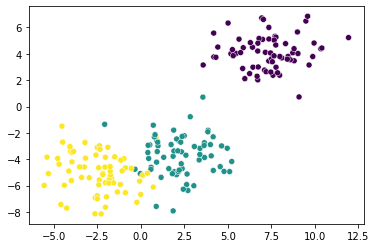

In [9]:
import seaborn as sns
sns.scatterplot(x=features[:, 0], y=features[:, 1], c=true_labels)

In [13]:
scaler = StandardScaler()

In [14]:
scaled_features = scaler.fit_transform(features)

<AxesSubplot:>

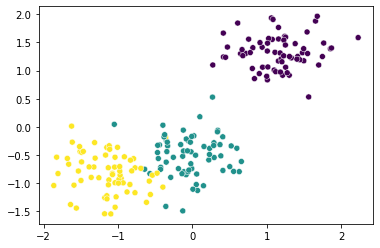

In [15]:
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

In [16]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300)

In [17]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [18]:
kmeans.cluster_centers_

array([[ 1.14972463,  1.31740571],
       [-0.02334818, -0.52432463],
       [-1.16067498, -0.80941704]])

In [63]:
kmeans.n_iter_

8

In [19]:
kmeans.labels_

array([2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1,
       2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1,
       0, 1], dtype=int32)

<AxesSubplot:title={'center':'k means labels'}>

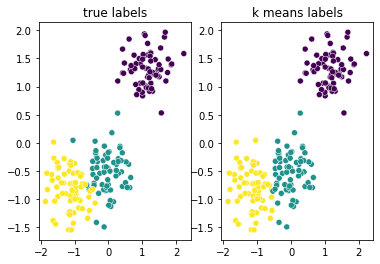

In [20]:
import pylab
pylab.subplot(1, 2, 1)
pylab.title("true labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

pylab.subplot(1, 2, 2)
pylab.title("k means labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=kmeans.labels_)

In [21]:
kmeans.inertia_

46.270225032511895

In [24]:
cluster_sizes = range(1, 11)
sse = []
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

<AxesSubplot:>

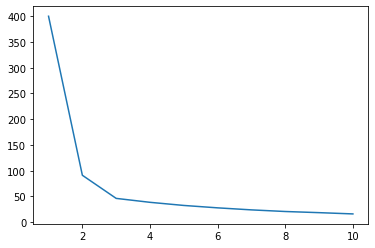

In [25]:
sns.lineplot(x=cluster_sizes, y=sse)

In [26]:
kl = KneeLocator(cluster_sizes, sse, curve="convex", direction="decreasing")

In [27]:
kl.elbow

3

In [28]:
silhouette_coefficients = []
cluster_sizes = range(2, 11)
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

<AxesSubplot:>

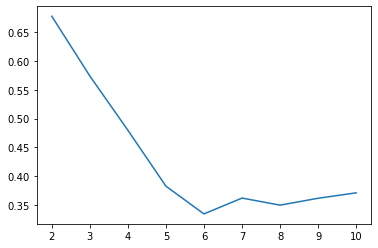

In [29]:
sns.lineplot(x=cluster_sizes, y=silhouette_coefficients)

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
from sklearn.datasets import make_moons

In [44]:
from sklearn.metrics import adjusted_rand_score

In [70]:
features, true_labels = make_moons(n_samples=250, noise=0.05)
scaled_features = scaler.fit_transform(features)

<AxesSubplot:>

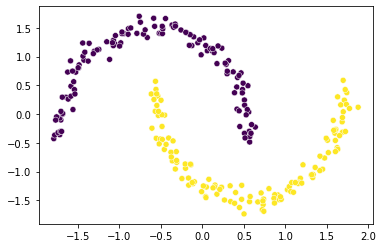

In [71]:
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

In [72]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

In [73]:
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

DBSCAN(eps=0.3)

In [74]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

In [75]:
kmeans_silhouette

0.5

In [76]:
dbscan_silhouette

0.39

<AxesSubplot:title={'center':'dbscan labels'}>

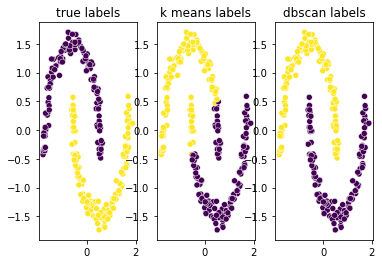

In [77]:
pylab.subplot(1, 3, 1)
pylab.title("true labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

pylab.subplot(1, 3, 2)
pylab.title("k means labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=kmeans.labels_)

pylab.subplot(1, 3, 3)
pylab.title("dbscan labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=dbscan.labels_)

In [78]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)

In [79]:
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [80]:
round(ari_kmeans, 2)

0.5

In [81]:
round(ari_dbscan, 2)

1.0